In [6]:
#!pip install opencv-python-headless tensorflow matplotlib

In [7]:
#!pip install --upgrade tensorflow keras

In [8]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [9]:
model_path = 'CustomCNN.keras'
model = load_model(model_path)

class_names = ['Bacterial blight', 'Brown spot', 'Leaf smut']

In [10]:
def preprocess_image(image_path, img_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [11]:
def predict_and_display(image_path):
    img = preprocess_image(image_path)

    predictions = model.predict(img)
    confidence = np.max(predictions)
    predicted_class = class_names[np.argmax(predictions)]

    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence * 100:.2f}%")

    img_display = cv2.imread(image_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.title(f"{predicted_class} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Predicted Class: Leaf smut
Confidence: 100.00%


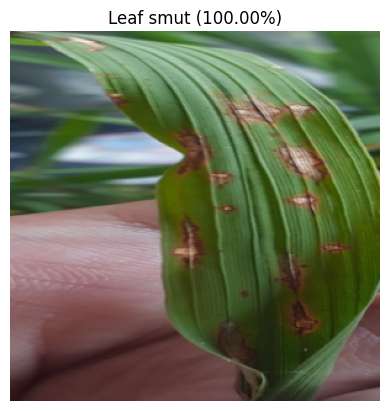

In [12]:
image_path = '/content/BLAST1_012.jpg'
predict_and_display(image_path)